#           **Distribuciones asimétricas y leptocúrticas**
###        Representatividad de distribuciones complejas
Andrés Gayón García

Este trabajo nació de la necesidad de establecer un dato único para representar el salario de la población mexicana. Es bien sabido que la distribución del ingreso es desigual a lo largo del mundo. Esta situación ocasiona que la distribución carezca de parecido con una distribución normal. 

In [9]:
# Se importan librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, normaltest, jarque_bera, anderson
import warnings
warnings.filterwarnings("ignore")


In [10]:
# Se leen los datos de población
# Se utiliza el cuarto trimestre de 2023 reportado por la ENOE
# https://www.inegi.org.mx/programas/enoe/15ymas/#microdatos
enoe_load = pd.read_csv('insumos/ENOE_SDEMT423.csv', encoding='latin1')

# Nos quedamos unicamente con la columna de salario por hora y renombramos
enoe = enoe_load[['ing_x_hrs']]
enoe.rename(columns={'ing_x_hrs': 'ingreso'}, inplace=True)

# Filtramos para excluir valores nulos y 0 
enoe = enoe[enoe['ingreso'] > 0]
enoe = enoe.dropna()

Se ignoran los ceros ya que, para efectos de este análisis, nos concentramos en personas que sí reciben un ingreso.

**Visualización de la distribución de ingreso**

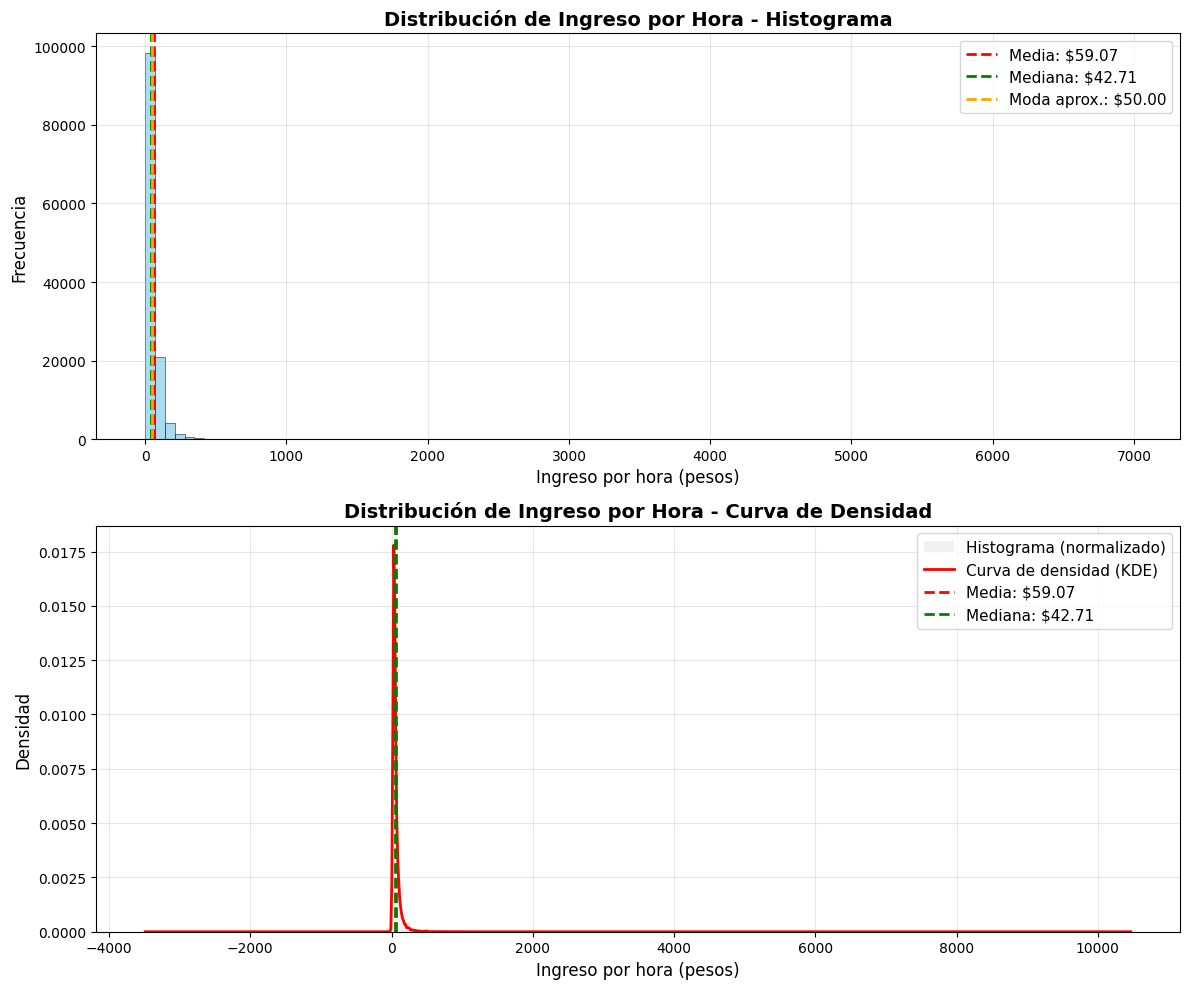


📊 ESTADÍSTICAS DESCRIPTIVAS:
   • Media:    $59.07
   • Mediana:  $42.71
   • Moda:     $50.00
   • Desv. Est: $75.23
   • Asimetría: 20.526
   • Curtosis:  1069.077
   • N observaciones: 126,072


In [14]:
# Visualización de la distribución de ingreso
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico 1: Histograma con estadísticas
ax1.hist(enoe['ingreso'], bins=100, alpha=0.7, color='skyblue', edgecolor='black', linewidth=0.5)
ax1.set_title('Distribución de Ingreso por Hora - Histograma', fontsize=14, fontweight='bold')
ax1.set_xlabel('Ingreso por hora (pesos)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)

# Calculamos y mostramos estadísticas
mean = enoe['ingreso'].mean() 
median = enoe['ingreso'].median()
mode_approx = enoe['ingreso'].mode()[0] if len(enoe['ingreso'].mode()) > 0 else median

# Líneas verticales para las medidas de tendencia central
ax1.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Media: ${mean:.2f}')
ax1.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Mediana: ${median:.2f}')
ax1.axvline(mode_approx, color='orange', linestyle='--', linewidth=2, label=f'Moda aprox.: ${mode_approx:.2f}')

ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Curva de densidad (KDE) sola
ax2.hist(enoe['ingreso'], bins=100, alpha=0.3, color='lightgray', density=True, label='Histograma (normalizado)')
enoe['ingreso'].plot(kind='kde', ax=ax2, color='red', linewidth=2, label='Curva de densidad (KDE)')

ax2.set_title('Distribución de Ingreso por Hora - Curva de Densidad', fontsize=14, fontweight='bold')
ax2.set_xlabel('Ingreso por hora (pesos)', fontsize=12)
ax2.set_ylabel('Densidad', fontsize=12)

# Líneas verticales para las medidas de tendencia central
ax2.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Media: ${mean:.2f}')
ax2.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Mediana: ${median:.2f}')

ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostramos estadísticas descriptivas
print(f"\n📊 ESTADÍSTICAS DESCRIPTIVAS:")
print(f"   • Media:    ${mean:.2f}")
print(f"   • Mediana:  ${median:.2f}")
print(f"   • Moda:     ${mode_approx:.2f}")
print(f"   • Desv. Est: ${enoe['ingreso'].std():.2f}")
print(f"   • Asimetría: {enoe['ingreso'].skew():.3f}")
print(f"   • Curtosis:  {enoe['ingreso'].kurtosis():.3f}")
print(f"   • N observaciones: {len(enoe):,}")

In [13]:
# Pruebas de normalidad para la distribución de ingreso

# Extraemos la serie de ingreso y tomamos una muestra (Shapiro-Wilk tiene límite de 5000 obs)
ingreso_serie = enoe['ingreso'].values
muestra = np.random.choice(ingreso_serie, size=min(5000, len(ingreso_serie)), replace=False)

print("PRUEBAS DE NORMALIDAD PARA LA DISTRIBUCIÓN DE INGRESO")
print("=" * 60)

# 1. Prueba de Shapiro-Wilk (más potente para muestras pequeñas)
stat_shapiro, p_shapiro = shapiro(muestra)
print(f"1. Prueba de Shapiro-Wilk:")
print(f"   Estadístico: {stat_shapiro:.6f}")
print(f"   p-valor: {p_shapiro:.2e}")
print(f"   Resultado: {'Normal' if p_shapiro > 0.05 else 'No Normal'} (α = 0.05)")

# 2. Prueba de D'Agostino-Pearson (omnibus test)
stat_dagostino, p_dagostino = normaltest(ingreso_serie)
print(f"\n2. Prueba de D'Agostino-Pearson (Omnibus):")
print(f"   Estadístico: {stat_dagostino:.6f}")
print(f"   p-valor: {p_dagostino:.2e}")
print(f"   Resultado: {'Normal' if p_dagostino > 0.05 else 'No Normal'} (α = 0.05)")

# 3. Prueba de Jarque-Bera (basada en asimetría y curtosis)
stat_jb, p_jb = jarque_bera(ingreso_serie)
print(f"\n3. Prueba de Jarque-Bera:")
print(f"   Estadístico: {stat_jb:.6f}")
print(f"   p-valor: {p_jb:.2e}")
print(f"   Resultado: {'Normal' if p_jb > 0.05 else 'No Normal'} (α = 0.05)")

# 4. Prueba de Anderson-Darling
result_anderson = anderson(muestra, dist='norm')
print(f"\n4. Prueba de Anderson-Darling:")
print(f"   Estadístico: {result_anderson.statistic:.6f}")
print(f"   Valores críticos: {result_anderson.critical_values}")
print(f"   Niveles de significancia: {result_anderson.significance_level}")

# Determinar resultado de Anderson-Darling
anderson_result = "Normal"
for i, (cv, sl) in enumerate(zip(result_anderson.critical_values, result_anderson.significance_level)):
    if result_anderson.statistic > cv:
        anderson_result = f"No Normal (α = {sl/100})"
        break

print(f"   Resultado: {anderson_result}")

print("\n" + "=" * 60)
print("INTERPRETACIÓN:")
print("- H0: Los datos siguen una distribución normal")
print("- H1: Los datos NO siguen una distribución normal")
print("- Si p-valor < 0.05, rechazamos H0 (distribución no normal)")
print("- Si p-valor ≥ 0.05, no rechazamos H0 (posible distribución normal)")

PRUEBAS DE NORMALIDAD PARA LA DISTRIBUCIÓN DE INGRESO
1. Prueba de Shapiro-Wilk:
   Estadístico: 0.447019
   p-valor: 2.42e-82
   Resultado: No Normal (α = 0.05)

2. Prueba de D'Agostino-Pearson (Omnibus):
   Estadístico: 282057.547893
   p-valor: 0.00e+00
   Resultado: No Normal (α = 0.05)

3. Prueba de Jarque-Bera:
   Estadístico: 6012169034.613585
   p-valor: 0.00e+00
   Resultado: No Normal (α = 0.05)

4. Prueba de Anderson-Darling:
   Estadístico: 582.671406
   Valores críticos: [0.576 0.655 0.786 0.917 1.091]
   Niveles de significancia: [15.  10.   5.   2.5  1. ]
   Resultado: No Normal (α = 0.15)

INTERPRETACIÓN:
- H0: Los datos siguen una distribución normal
- H1: Los datos NO siguen una distribución normal
- Si p-valor < 0.05, rechazamos H0 (distribución no normal)
- Si p-valor ≥ 0.05, no rechazamos H0 (posible distribución normal)


Como podemos ver, la distribución es muy asimétrica positivamente, y dista de ser una distribución normal, como confirma la prueba de **Jarque-Bera** (y otras pruebas de normalidad). Esto ocasiona un problema al escoger el promedio como la métrica representativa, en contra de la intuición de muchos, ya que esta puede estar "inflada" por las observaciones de ingreso extremadamente altas. El promedio resulta extremadamente útil con muestras que se acercan más a una distribución normal, distribuciones simétricas de curtosis variada.

Si bien el dato representativo que se elija (media o mediana) difieren por tan solo $16.35, al momento de usar este dato para estimar costos de oportunidad, elegir uno u otro puede hacer variar los resultados en miles de millones de pesos